# Author: Olufemi Victor

Linear Regression with Python.
This task is in fufilment of my internship with The Sparks Foundation during GRIP. The task entails simple linear regression with python to predict the score of a student based on the number of hours put into preparation.

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# read in the CSV file via the url and print out the head.
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Making Plots
In this section, i wnted to see a graphical representation of the data, so i used a scatter plot and a bar plot to view it. To make it more interesting, i used the Bar Plot also.
Looking at the code, i increased the plot dimensions.

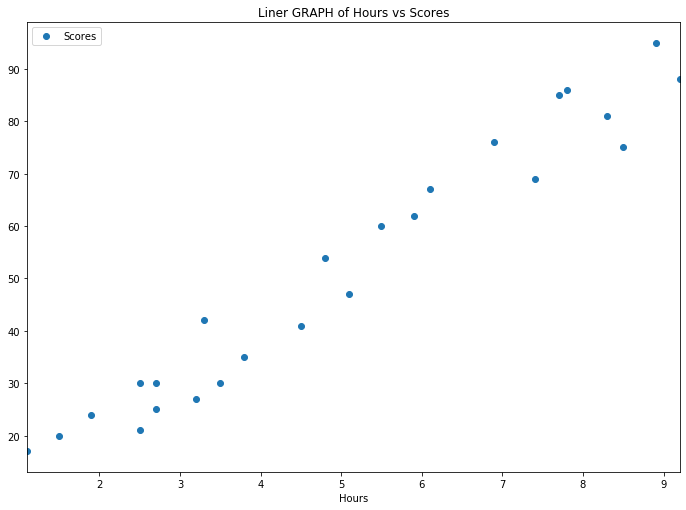

In [153]:
# here is a simple scatter plot of number of hours read vs the score.
plot_dimensions = (11.7, 8.27) # i increased the dimensions for the plot
data.plot(x='Hours', y='Scores', style='o',figsize=plot_dimensions)
plt.title("Liner GRAPH of Hours vs Scores")
plt.show()

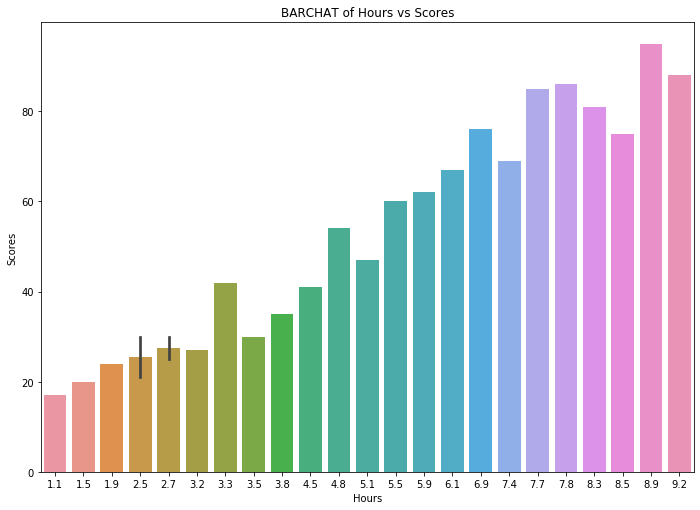

In [154]:
# I used the seaborn library to do a bar chart plot.
fig, ax = plt.subplots(figsize=plot_dimensions)
sns.barplot(x = data.Hours, y = data.Scores, ax = ax)
plt.title("BARCHAT of Hours vs Scores")
plt.show()

###### Getting data prepared.
First, i extract the independent columns (X-axis), in this case, it's only one and that is the hours column. Similarly, i also extract the dependent or target column which is the score.
You must have noticed that i had to make sure my independent features are in some sort of 2d array instead of just ordinary values.

In [155]:
hours = data.iloc[:, :-1].values
scores = data.iloc[:, 1].values

Here i imported the library train test split to split my data into train and test forms. i set the test size to 20  percent of the total and the random state to 42. The random state is set to ensure a reproducible prediction.

In [156]:
from sklearn.model_selection import train_test_split
hours_train, hours_test, scores_train, scores_test = train_test_split(hours,scores, test_size = 0.2, random_state = 42)

In [157]:
#import Linear Regression.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fit the train set into linear regression.
regressor.fit(hours_train, scores_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### Plot a graph of the model.
I did a plot of the model and scattered the Actual plots on it to see how well my model fit on the dataset.

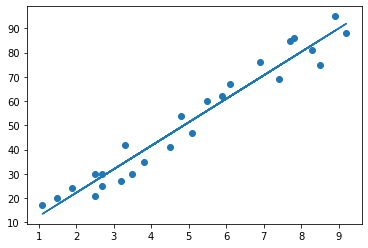

In [158]:
# Plotting the regression line
line = regressor.coef_*hours+regressor.intercept_

# Plotting for the data
plt.scatter(hours, scores)
plt.plot(hours, line);
plt.show()

######  Making Predictions
To make predictions is quite easy, all you need is the model.predict method. Since i have a test set which the model hasn't seeen, i'll use this to evaluate my model.

In [159]:
score_predictions = regressor.predict(hours_test)

In [160]:
#Preview Actual and predicted side by side
pd.DataFrame({"Predicted Score":scores_test,"Actual Score":score_predictions})

,Predicted Score,Actual Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## THE TASK:
The task given is to predict the score for someone who spends 9.25 hours reading.

In [161]:
userHourInput = 9.25
predicted_score = regressor.predict(np.array(userHourInput).reshape(-1, 1))
print("The predicted score based on your number of reading hours is {}%".format(predicted_score[0]))

The predicted score based on your number of reading hours is 92.38611528261494%


In the below code, i implement the variable such that it asks for number of reading hours from the user, and then predicts the score.

In [162]:
userHourInput = float(input("Type in the number of hours you read to predict your score "))
predicted_score = regressor.predict(np.array(userHourInput).reshape(-1, 1))
print("The predicted score based on your number of reading hours is {}%".format(predicted_score[0]))

Type in the number of hours you read to predict your score 7
The predicted score based on your number of reading hours is 70.60143943508962%


##### Evaluating Model
Lastly,i did a model evaluation to score the performance of my model. I used the test set to do the evaluation.

In [163]:
from sklearn.metrics import mean_absolute_error as MAE
MAE(scores_test, score_predictions)

3.9207511902099244